In [47]:
suppressWarnings(suppressMessages(library("rvest")))
suppressWarnings(suppressMessages(library("tidyverse")))
suppressWarnings(suppressMessages(library("magrittr")))
suppressWarnings(suppressMessages(library("XML")))
suppressWarnings(suppressMessages(library("dplyr")))
suppressWarnings(suppressMessages(library("lubridate")))
suppressWarnings(suppressMessages(library("dplyr")))

In [48]:
library(magrittr) # needs to be run every time you start R and want to use %>%
library(dplyr) 

In [49]:
3+c(1, 2, 3, 4, 5) == 3+1:5
1:10  %>%  mean

[1] TRUE TRUE TRUE TRUE TRUE

[1] 5.5

In [6]:
(3+1):5 == 4:5
matrix(data = 1:6, nrow = 2, ncol = 3, byrow = TRUE)

[1] TRUE TRUE

1,2,3
4,5,6


Распространенной формой анализа данных является метод «разделить-применить-объединить», в котором вы разбиваете свои данные на группы, применяете своего рода
обработка по каждой группе, а затем объединить результаты.
Давайте рассмотрим анализ данных, где мы хотим получить две машины с лучшими милями на галлон (миль на галлон) для каждого
количество цилиндров (цил) во встроенном наборе данных mtcars. Сначала мы разбиваем фрейм данных mtcars на количество цилиндров:

In [23]:
(spl <- split(mtcars, mtcars$cyl))

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2


Теперь мы можем использовать lapply для циклического просмотра этого списка, применяя нашу функцию, которая извлекает автомобили с лучшими 2 миль на галлон
значения из каждого из элементов списка

In [21]:

(best2 <- lapply(spl, function(x) tail(x[order(x$mpg),], 2)))

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


Теперь мы можем использовать lapply для циклического просмотра этого списка, применяя нашу функцию, которая извлекает автомобили с лучшими 2 миль на галлон
значения из каждого из элементов списка:
Наконец, мы можем объединить все вместе, используя rbind. Мы хотим вызвать rbind (best2 [["4"]], best2 [["6"]],
best2 [["8"]]), но это было бы утомительно, если бы у нас был огромный список. В результате мы используем:

In [22]:
do.call(rbind, best2)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
4.Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
6.Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
6.Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
8.Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
8.Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2


Это возвращает результат rbind (аргумент 1, функция) со всеми элементами best2 (аргумент 2, список), переданными как
аргументы.
С такими простыми анализами, как этот, можно сделать более компактным (и, возможно, гораздо менее читабельным!) Весь разделение.
применить-объединить в одной строке кода:
do.call (rbind, lapply (split (mtcars, mtcars $ cyl), функция (x) tail (x [order (x $ mpg),], 2)))
Также стоит отметить, что комбинация lapply (split (x, f), FUN) может быть альтернативно оформлена с помощью? By
функция:
by (mtcars, mtcars $ cyl, function (x) tail(x[order (x $ mpg),], 2))
do.call (rbind, by (mtcars, mtcars $ cyl, function (x) tail (x [order (x $ mpg),], 2)))

In [24]:
by(mtcars, mtcars$cyl, function(x) tail(x[order (x$mpg),], 2))
do.call(rbind, by (mtcars, mtcars$cyl, function(x) tail(x[order (x$mpg),], 2)))

mtcars$cyl: 4
                mpg cyl disp hp drat    wt  qsec vs am gear carb
Fiat 128       32.4   4 78.7 66 4.08 2.200 19.47  1  1    4    1
Toyota Corolla 33.9   4 71.1 65 4.22 1.835 19.90  1  1    4    1
------------------------------------------------------------ 
mtcars$cyl: 6
                mpg cyl disp  hp drat    wt  qsec vs am gear carb
Mazda RX4 Wag  21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
Hornet 4 Drive 21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
------------------------------------------------------------ 
mtcars$cyl: 8
                   mpg cyl disp  hp drat    wt  qsec vs am gear carb
Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2
Pontiac Firebird  19.2   8  400 175 3.08 3.845 17.05  0  0    3    2

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
4.Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
6.Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
6.Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
8.Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
8.Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2


In [27]:
testdata <- c("e", "o", "r", "g", "a", "y", "w", "q", "i", "s", "b", "v", "x", "h", "u")
vowels <- c('a','e','i','o','u','y')
letter_type <- ifelse(testdata %in% vowels, "vowels", "consonants")
split(testdata, letter_type)

$consonants
[1] "r" "g" "w" "q" "s" "b" "v" "x" "h"

$vowels
[1] "e" "o" "a" "y" "i" "u"

In [51]:
testdata <- c("е", "о", "р", "п", "а", "у", "ф", "к", "и", "с", "б", "э", "х", "я", "ы")
vowels <- c('а','у','о','ы','и','э','я','ю','ё','е') # а, у, о, ы, и, э, я, ю, ё, е
letter_type <- ifelse(testdata %in% vowels, "vowels", "consonants")
sp = split(testdata, letter_type)
sp

$consonants
[1] "р" "п" "ф" "к" "с" "б" "х"

$vowels
[1] "е" "о" "а" "у" "и" "э" "я" "ы"

In [42]:
length(testdata)

[1] 15


Call:
lm(formula = mpg ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10


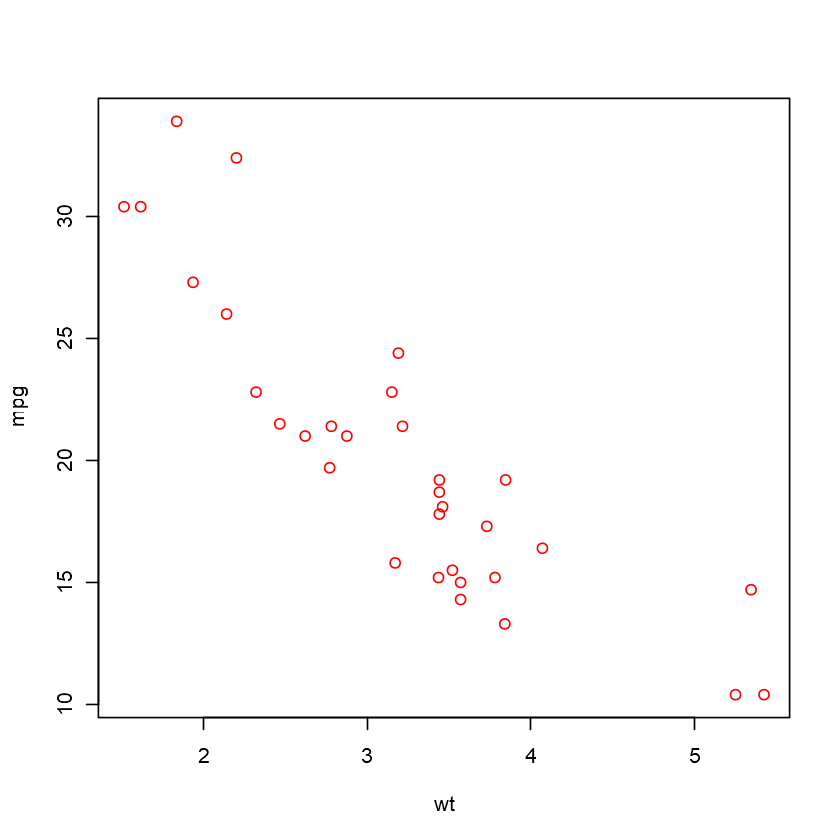

In [53]:
plot(mpg ~ wt, data = mtcars, col=2)
fit <- lm(mpg ~ wt, data = mtcars)
summary(fit)

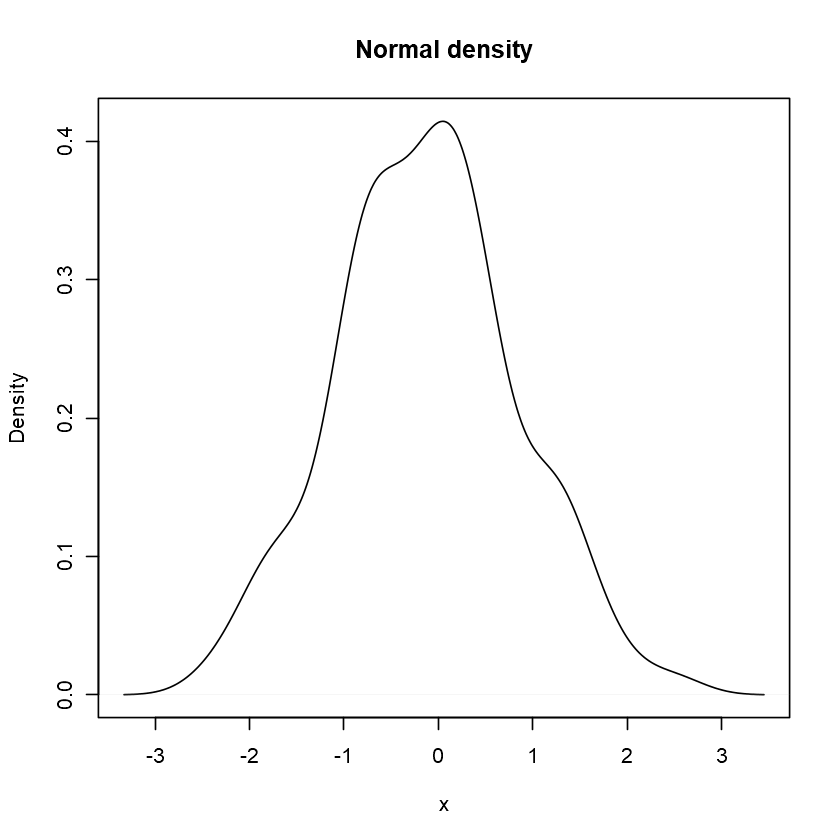

In [54]:
plot(density(rnorm(100)),main="Normal density",xlab="x")

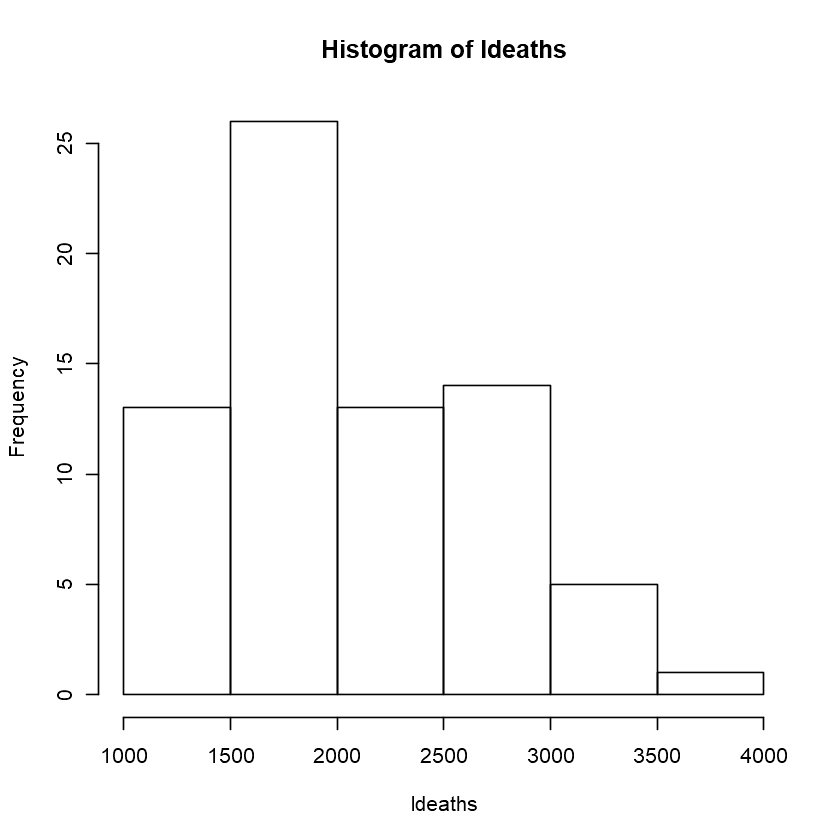

In [55]:
hist(ldeaths)

In [56]:
sample(6) # Random Numbers Generator

[1] 2 6 1 5 4 3

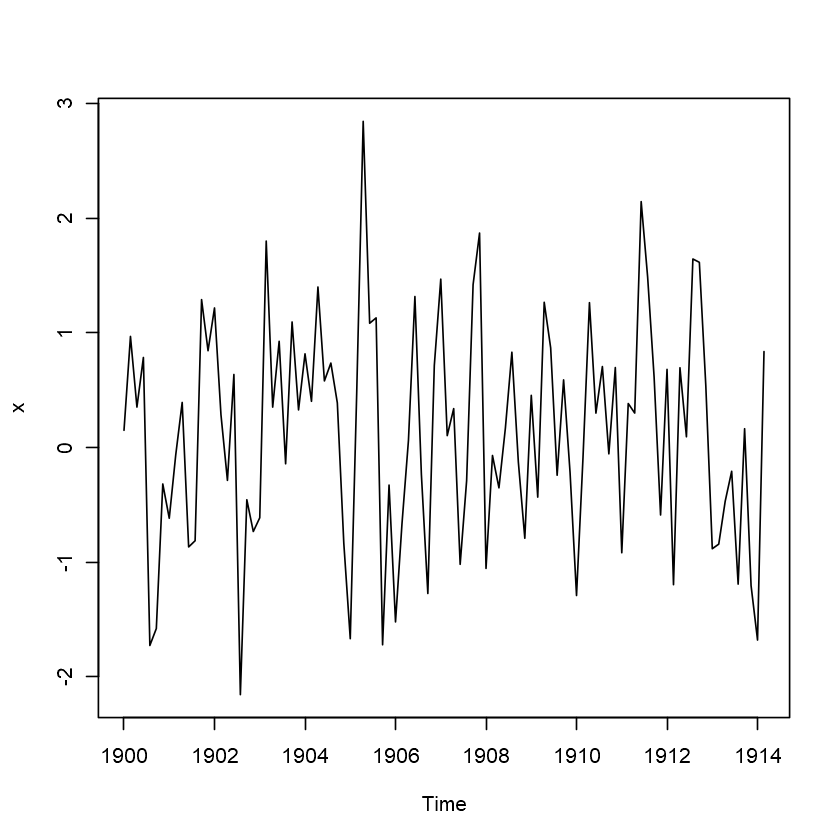

In [58]:
#Create a dummy dataset of 100 observations
x <- rnorm(100)
#Convert this vector to a ts object with 100 annual observations
x <- ts(x, start = c(1900), freq = 1)
#Convert this vector to a ts object with 100 monthly observations starting in July
x <- ts(x, start = c(1900, 7), freq = 12)
#Alternatively, the starting observation can be a number:
x <- ts(x, start = 1900.5, freq = 12)
#Convert this vector to a ts object with 100 daily observations and weekly frequency starting in
# the first week of 1900
x <- ts(x, start = c(1900, 1), freq = 7)
#The default plot for a ts object is a line plot
plot(x)

In [59]:
data(AirPassengers)
class(AirPassengers)

[1] "ts"

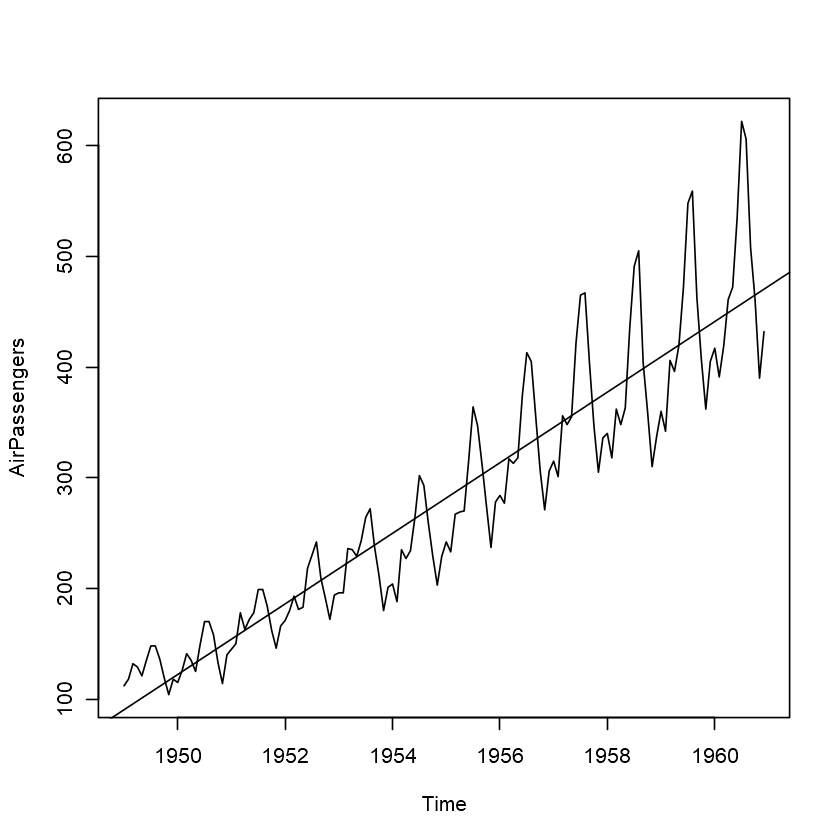

In [60]:
plot(AirPassengers) # plot the raw data
abline(reg=lm(AirPassengers~time(AirPassengers))) # fit a trend line

In [61]:
cycle(AirPassengers)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,1,2,3,4,5,6,7,8,9,10,11,12
1950,1,2,3,4,5,6,7,8,9,10,11,12
1951,1,2,3,4,5,6,7,8,9,10,11,12
1952,1,2,3,4,5,6,7,8,9,10,11,12
1953,1,2,3,4,5,6,7,8,9,10,11,12
1954,1,2,3,4,5,6,7,8,9,10,11,12
1955,1,2,3,4,5,6,7,8,9,10,11,12
1956,1,2,3,4,5,6,7,8,9,10,11,12
1957,1,2,3,4,5,6,7,8,9,10,11,12
1958,1,2,3,4,5,6,7,8,9,10,11,12


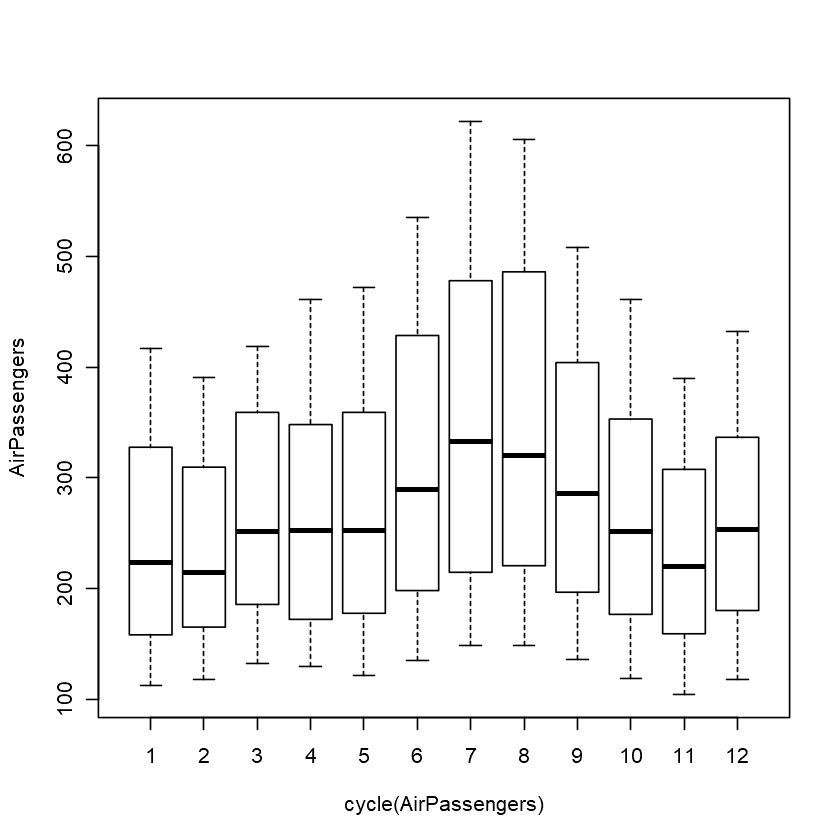

In [62]:
boxplot(AirPassengers~cycle(AirPassengers)) #Box plot across months to explore seasonal effects

In [63]:
temp <- c("this,that,other", "hat,scarf,food", "woman,man,child")
# get a list split by commas
myList <- strsplit(temp, split=",")
# print myList
myList

[[1]]
[1] "this"  "that"  "other"

[[2]]
[1] "hat"   "scarf" "food" 

[[3]]
[1] "woman" "man"   "child"

In [7]:
my_formula1 <- formula(mpg ~ wt)
class(my_formula1)
mod1 <- lm(my_formula1, data = mtcars)
coef(mod1)

[1] "formula"

(Intercept)          wt 
  37.285126   -5.344472

In [8]:
coef(lm(mpg ~ ., data = mtcars))

(Intercept)         cyl        disp          hp        drat          wt 
12.30337416 -0.11144048  0.01333524 -0.02148212  0.78711097 -3.71530393 
       qsec          vs          am        gear        carb 
 0.82104075  0.31776281  2.52022689  0.65541302 -0.19941925

cnt <- c('France', 'Hungary', 'Ukraine', 'Romania', 'Germany', 'Russia', 'Finland', 'Italy', 'Spain')
Напишите код, который перебирает элементы вектора cnt до тех пор, пока не дойдет до России. Если название страны отлично от ‘Russia’, на экран должно выводиться сообщение “It is not Russia.”, а если название совпадает с ‘Russia’, на экран должно выводиться сообщение: “Russia is found. Its number is n”, где n - порядковый номер России в списке.

а) Используйте цикл for.

б) используйте цикл while.

Внимание: Ваш код должен работать корректно и в том случае, если мы изменим порядок элементов в векторе cnt!

In [ ]:
cnt <- c('France', 'Hungary', 'Ukraine', 'Romania', 'Germany', 'Russia', 'Finland', 'Italy', 'Spain')

In [ ]:
for i 